# Ranking

# 1. Defining the Question

### a) Specifying the Question

> We are to make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly. 

### b) Defining the Metric for Success

> We will use the root mean square in Polynomial regression to measure the performace of the model. The accuracy score and the f1 score will be used in the logistic regression to measure performance.

### c) Understanding the context 

> The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Brazil.[1] The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest.
> A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams.

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Modelling
7. Answering the question
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

# 2. Reading the Data

## Importing Libraries

In [63]:
# Importing libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading datasets

In [64]:
ranking = pd.read_csv('/home/addam/Downloads/core/ippweek 6/Week 6 IP Datasets/fifa_ranking.csv')

In [65]:
results = pd.read_csv('/home/addam/Downloads/core/ippweek 6/Week 6 IP Datasets/results.csv')

# 3. Checking the Data

In [66]:
# top of dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [67]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [68]:
# bottom of dataset

ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [69]:
# variable name definitions
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [70]:
# Determining the no. of records in our ranking dataset
#
ranking.count()

rank                       57793
country_full               57793
country_abrv               57793
total_points               57793
previous_points            57793
rank_change                57793
cur_year_avg               57793
cur_year_avg_weighted      57793
last_year_avg              57793
last_year_avg_weighted     57793
two_year_ago_avg           57793
two_year_ago_weighted      57793
three_year_ago_avg         57793
three_year_ago_weighted    57793
confederation              57793
rank_date                  57793
dtype: int64

In [71]:
# Determining the no. of records in our results dataset
#
results.count()

date          40839
home_team     40839
away_team     40839
home_score    40839
away_score    40839
tournament    40839
city          40839
country       40839
neutral       40839
dtype: int64

In [72]:
# Checking whether each column has an appropriate datatype
#
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [73]:
# information on results dataset
results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [74]:
# renaming columns
'''
df.columns = ['country', 'year', 'uniqueid', 'has_a_bank_account','location_type', 'cellphone_access', 
'household_size', 'respondent_age', 'gender_of_respondent',
 'relationship_with_head', 'marital_status','education_level', 'job_type']

df.head()'''

"\ndf.columns = ['country', 'year', 'uniqueid', 'has_a_bank_account','location_type', 'cellphone_access', \n'household_size', 'respondent_age', 'gender_of_respondent',\n 'relationship_with_head', 'marital_status','education_level', 'job_type']\n\ndf.head()"

# 4. External Data Source Validation

> According to wikipedia, FIFA announced they were reviewing the ranking system and would decide after the end of the 2018 FIFA World Cup qualification if any changes are to be made to improve the ranking. FIFA announced on 10 June 2018 that the ranking system would be updated following the 2018 World Cup finals. The calculation method to be adopted will be closely modelled after the Elo rating system and rankings of its member associations will be updated on a game-by-game basis. The weighting designated for each confederation for ranking purposes will be abolished. However, the new methodology does not account for home or away games and margin of the victory, as Elo rankings.
> Starting with the April 2021 rankings, the teams' points are now rounded to two decimal points, instead of being rounded to the nearest integer.
> The rankings are used by FIFA to rank the progression and current ability of the national football teams of its member nations, and claims that they create "a reliable measure for comparing national A-teams

# 5. Data Cleaning

In [75]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

### a. Validation

/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


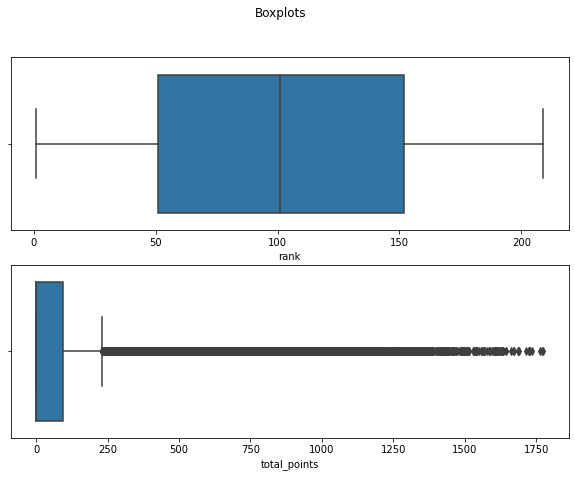

In [76]:
# Checking for Outliers
#
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(ranking['rank'], ax=ax1)
sns.boxplot(ranking['total_points'], ax=ax2)

plt.show()

As we can see from above, there are no outliers in the rank. However, 

## Dropping outliers

In [77]:
'''# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df.shape)'''

"# Calculating our first, third quantiles and then later our IQR\n# ---\nQ1 = df.quantile(0.25)\nQ3 = df.quantile(0.75)\nIQR = Q3 - Q1\n\n# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'\n# ---\n# \ndf = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]\n\n# Printing the shape of our new dataset\n# ---\n# \nprint(df.shape)"

In [78]:
'''# confirming no outliers

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['respondent_age'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)

plt.show()'''

"# confirming no outliers\n\nfig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))\nfig.suptitle('Boxplots')\nsns.boxplot(df['respondent_age'], ax=ax1)\nsns.boxplot(df['household_size'], ax=ax2)\n\nplt.show()"

There seems to be data within our range in the respondent age. 

## checking missing data

In [79]:
# Identifying the Missing Data
# ranking
ranking.isnull().sum().sum()

0

In [80]:
# results

results.isnull().sum().sum()


0

In [81]:
ranking.shape

(57793, 16)

In [82]:
results.shape

(40839, 9)

In [83]:
# Dealing with the Missing Data
#
ranking.dropna(inplace=True)

In [84]:
# 
results.dropna(inplace=True)

## checking duplicates

In [85]:
# checking ranking duplicates and dropping
ranking.duplicated().sum()
ranking.drop_duplicates().head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [86]:
# checking results duplicates and dropping
results.duplicated().sum()
results.drop_duplicates().head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## checking anomalies

### using isolation forest

In [87]:
# rank

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=0.08)
isolation_forest.fit(ranking['total_points'].values.reshape(-1, 1))
ranking['anomaly_score_rate'] = isolation_forest.decision_function(ranking['rank'].values.reshape(-1, 1))
ranking['outlier_univariate_rate'] = isolation_forest.predict(ranking['rank'].values.reshape(-1, 1))
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,anomaly_score_rate,outlier_univariate_rate
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.190396,1
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.150281,1
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.120967,1
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,0.085322,1
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,0.063045,1


In [88]:
# More data cleaning procedures
#confirming no missing data
print(ranking.isnull().sum().sum())

0


In [89]:
# Fixing messy column names
ranking.columns = ranking.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
ranking.columns

/tmp/ipykernel_11762/3307527866.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ranking.columns = ranking.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date',
       'anomaly_score_rate', 'outlier_univariate_rate'],
      dtype='object')

In [90]:
# checking our data
ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57793 entries, 0 to 57792
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

# 6. Exploratory Data Analysis: 

## Univariate analysis

In [91]:
# Ploting the univariate summaries and recording our observations

# mean household_size & respondent_age

ranking[['total_points']].mean()

total_points    122.068637
dtype: float64

The mean total_points was 122.0686

In [92]:
# max total_points 
ranking['total_points'].max()

1775.03

In [93]:
# min total_points 
ranking['total_points'].min()

0.0

In [94]:
# std total points

ranking['total_points'].std()

260.42686321662956

In [95]:
# quantiles

ranking['total_points'].quantile([0.25,0.5,0.75])

0.25     0.00
0.50     0.00
0.75    92.79
Name: total_points, dtype: float64

In [96]:
# skewness
ranking['total_points'].skew()

2.5875719934668084

<AxesSubplot:>

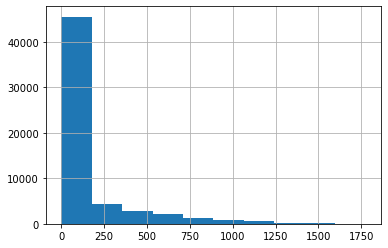

In [97]:
# histogram for total_points 
ranking['total_points'].hist()

The column is positively skewed.This shows that the tail on the right side of the curve is bigger than that on the left side.The mean is greater than the mode.

In [98]:
# kurtosis household_size
ranking['total_points'].kurt()

6.893278156043332

The kurtosis is 

In [99]:
ranking['total_points'].describe()

count    57793.000000
mean       122.068637
std        260.426863
min          0.000000
25%          0.000000
50%          0.000000
75%         92.790000
max       1775.030000
Name: total_points, dtype: float64

### categorical

In [100]:
''' def category(x):
    
    df.value_counts().plot(df[x], kind = 'barh')
    plt.title('East Africa info')


category('country')'''

" def category(x):\n    \n    df.value_counts().plot(df[x], kind = 'barh')\n    plt.title('East Africa info')\n\n\ncategory('country')"

In [101]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

## Bivariate analysis

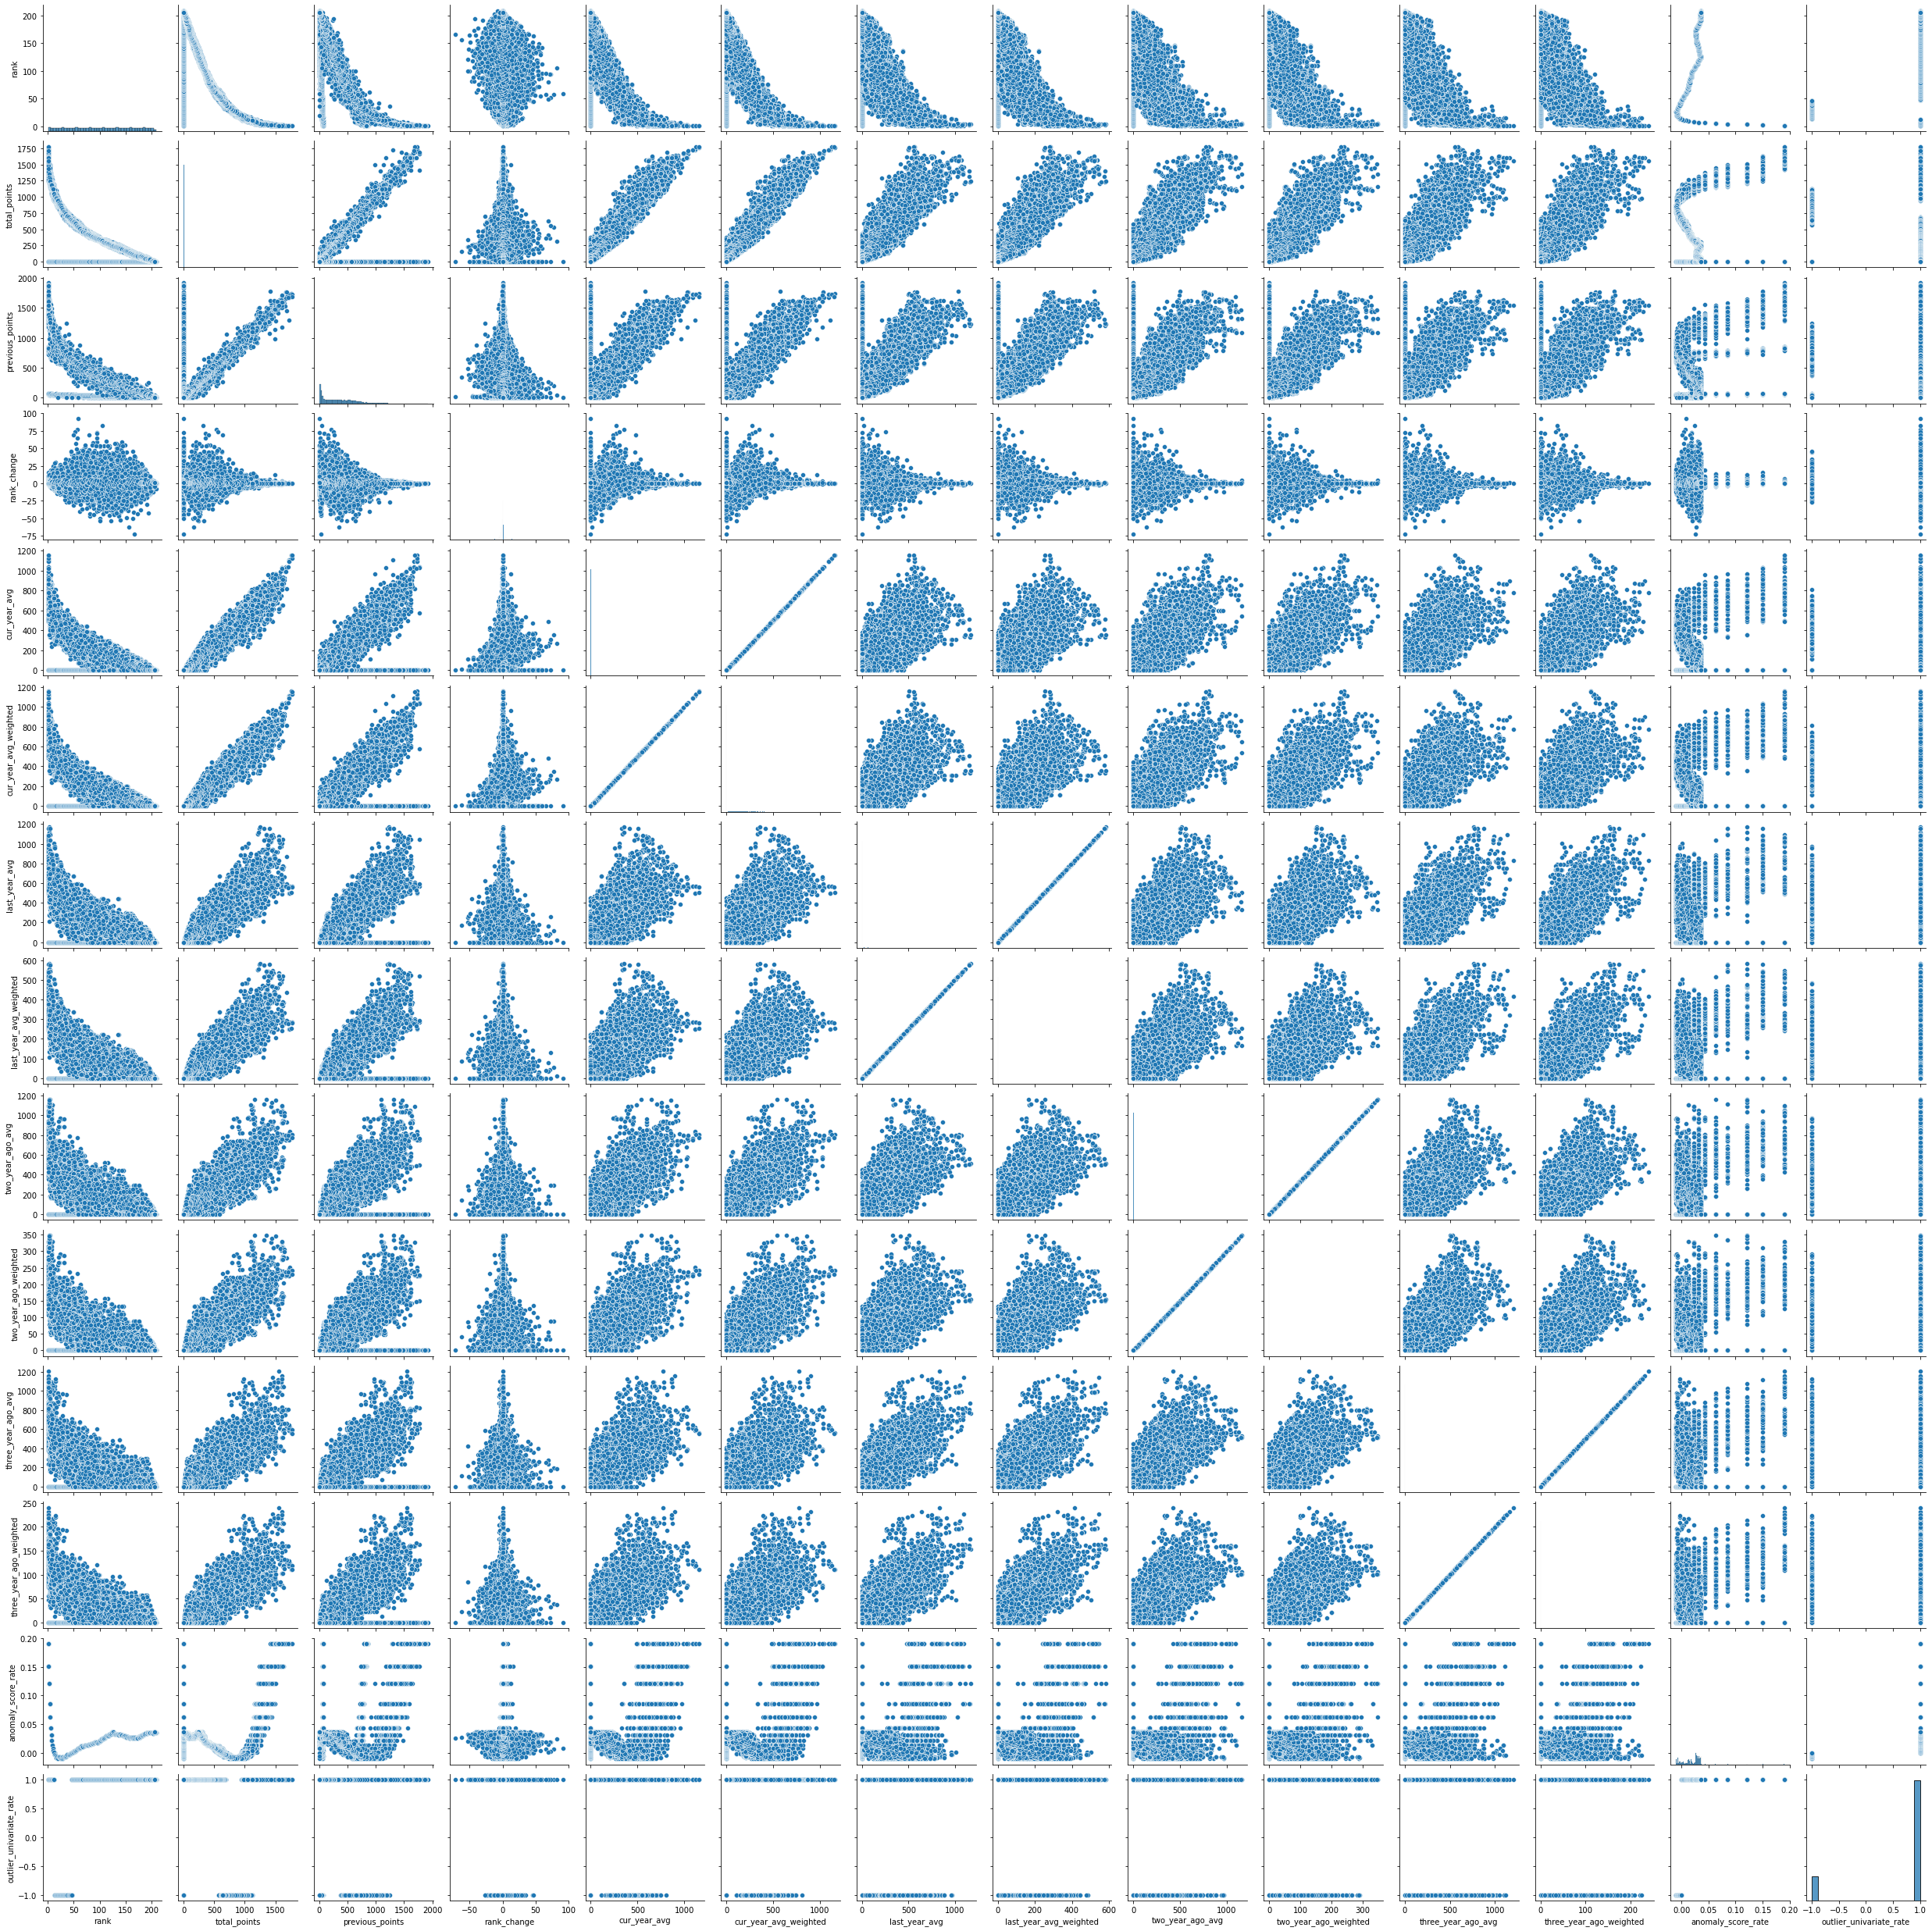

In [103]:
# Ploting the bivariate summaries and recording our observations
# ranking
sns.pairplot(ranking)
plt.show()

In [105]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date',
       'anomaly_score_rate', 'outlier_univariate_rate'],
      dtype='object')

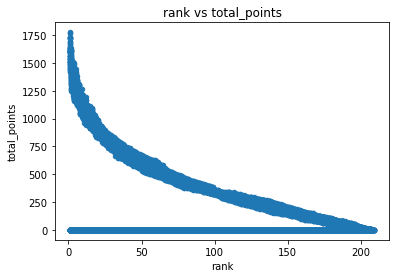

In [109]:
# Using Pandas: Plotting our scatterplot to compare the variables
ranking.plot(x = 'rank', y = 'total_points', kind='scatter')

# Giving our scatterplot a title
plt.title('rank vs total_points')

# Labelling our x axis
plt.xlabel('rank')

# Labelling our y axis
plt.ylabel('total_points')

# We then display our scatterplot as shown below
plt.show()

According to the above graphs, the total points decreases as the rank decreases.

In [104]:
# general correlation
ranking.corr()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,anomaly_score_rate,outlier_univariate_rate
rank,1.000000,-0.343806,-0.725829,-0.051719,-0.339931,-0.339931,-0.315359,-0.315358,-0.309038,-0.309037,-0.305259,-0.305259,0.322879,0.553537
total_points,-0.343806,1.000000,0.531626,0.019459,0.973089,0.973089,0.931486,0.931486,0.915520,0.915520,0.906238,0.906239,-0.035232,-0.190939
previous_points,-0.725829,0.531626,1.000000,-0.028783,0.519410,0.519410,0.495404,0.495404,0.483039,0.483038,0.476186,0.476186,-0.106293,-0.394777
rank_change,-0.051719,0.019459,-0.028783,1.000000,0.046161,0.046161,-0.015765,-0.015765,-0.004999,-0.004999,-0.000617,-0.000617,-0.021744,-0.026462
cur_year_avg,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843101,0.843102,0.846353,0.846353,0.839536,0.839536,-0.036732,-0.190134
cur_year_avg_weighted,-0.339931,0.973089,0.519410,0.046161,1.000000,1.000000,0.843101,0.843102,0.846353,0.846353,0.839536,0.839536,-0.036732,-0.190134
last_year_avg,-0.315359,0.931486,0.495404,-0.015765,0.843101,0.843101,1.000000,1.000000,0.840037,0.840037,0.849696,0.849697,-0.027943,-0.173781
last_year_avg_weighted,-0.315358,0.931486,0.495404,-0.015765,0.843102,0.843102,1.000000,1.000000,0.840037,0.840037,0.849697,0.849697,-0.027943,-0.173780
two_year_ago_avg,-0.309038,0.915520,0.483039,-0.004999,0.846353,0.846353,0.840037,0.840037,1.000000,1.000000,0.844669,0.844669,-0.032625,-0.172686
two_year_ago_weighted,-0.309037,0.915520,0.483038,-0.004999,0.846353,0.846353,0.840037,0.840037,1.000000,1.000000,0.844669,0.844669,-0.032625,-0.172686


<AxesSubplot:>

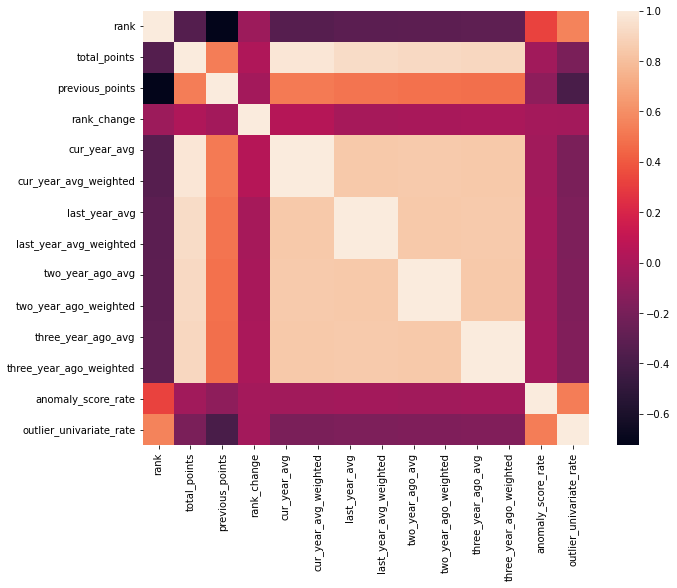

In [110]:
# heatmap
columns = ('rank', 'total_points')
f, ax = plt.subplots(figsize=(10, 8))
corr = ranking.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [111]:
# correlation
# Calculating the pearson coefficient
pc = ranking["rank"].corr(ranking["total_points"], method="pearson") 
print(pc)

# Checking whether you have to define the pearson
coeff = ranking["rank"].corr(ranking["total_points"]) 
print(coeff)

-0.343806288655887
-0.343806288655887


The above results show a negative relationship between the two variables since the correlation coefficient is less than 0. This is an indication that both variables move in the opposite direction. Therefore, if one variable increases, the other variable decreases with the same magnitude (and vice versa).

### categorical 